In [34]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2598 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1052 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0725 - accuracy: 0.9771


In [35]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0909 - accuracy: 0.9704
0.09092720597982407 0.9703999757766724


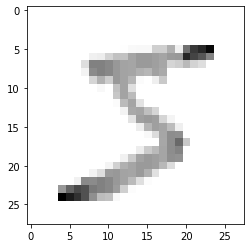

In [33]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [36]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [38]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [39]:
predictions = new_model.predict([x_test])

AttributeError: in user code:

    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:291 call
        outputs = layer(inputs, **kwargs)
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/tarekali/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:642 call
        input_shape = inputs.shape

    AttributeError: 'tuple' object has no attribute 'shape'


In [40]:
import numpy as np 

print(np.argmax(predictions[0]))

NameError: name 'predictions' is not defined

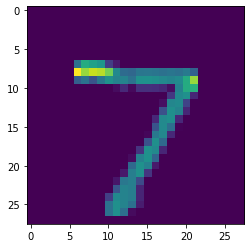

In [41]:
plt.imshow(x_test[0])
plt.show()